In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  #for plotting purpose
#from sklearn.preprocessing import linear_model   #for implementing multiple linear regression

In [ ]:
!pip install ta
!pip install stockstats

In [ ]:
from ta.trend import *
from ta.volatility import *
from ta.momentum import ROCIndicator
from ta.momentum import RSIIndicator
from ta.momentum import WilliamsRIndicator
from ta.volatility import BollingerBands
from ta.volume import MFIIndicator
from ta.volume import ChaikinMoneyFlowIndicator
from ta.trend import WMAIndicator
from ta.trend import TRIXIndicator
from ta.trend import DPOIndicator
from ta.trend import KSTIndicator
from ta.trend import ADXIndicator
from ta.volume import ForceIndexIndicator
from ta.volume import EaseOfMovementIndicator
from ta.volatility import AverageTrueRange
import time
from stockstats import StockDataFrame as sdf
from tqdm.auto import tqdm
import numpy as np

# Class setup indicators with ta library:
class TechnicalIndicator():
    def __init__(self, df):
        self.df = df
        # TODO initialize df here
        self.get_MACD()

    def get_roc(self, col_name: str, window: int):
        indicator_roc = ROCIndicator(col_name, window)
        self.df['roc_{}_{}'.format(window, col_name)] = indicator_roc.roc()

    def get_rsi(self, col_name: str, window: int):
        indicator_rsi = RSIIndicator(col_name, window)
        self.df['rsi_{}_{}'.format(window, col_name)] = indicator_rsi.rsi()

    def get_mfi(self, high: str, low: str, close: str, volume: str, window: int):
        indicator_mfi = MFIIndicator(high, low, close, volume, window)
        self.df['mfi_{}'.format(window)] = indicator_mfi.money_flow_index()

    def get_cmf(self, high: str, low: str, close: str, volume: str, window: int):
        indicator_cmf = ChaikinMoneyFlowIndicator(high, low, close, volume, window)
        self.df['cmf_{}'.format(window)] = indicator_cmf.chaikin_money_flow()

    def get_wma(self, col_name: str, window: int):
        indicator_wma = WMAIndicator(col_name, window)
        self.df['wma_{}_{}'.format(window, col_name)] = indicator_wma.wma()

    def get_trix(self, close: str, window: int):
        indicator_trix = TRIXIndicator(close, window)
        self.df['trix_{}'.format(window)] = indicator_trix.trix()

    def get_dpo(self, close: str, window: int):
        indicator_dpo = DPOIndicator(close, window)
        self.df['dpo_{}'.format(window)] = indicator_dpo.dpo()

    def get_kst(self, close: str, roc1: int, roc2: int, roc3: int, roc4: int, window1: int, window2: int, window3: int,
                window4: int, nsig: int):
        indicator_kst = KSTIndicator(close, roc1, roc2, roc3, roc4, window1, window2, window3, window4, nsig)
        self.df['kst'] = indicator_kst.kst()

    def get_adx(self, high: str, low: str, close: str, window: int):
        indicator_adx = ADXIndicator(high, low, close, window)
        self.df['adx_{}'.format(window)] = indicator_adx.adx()

    def get_fi(self, close: str, volume: str, window: int):
        indicator_fi = ForceIndexIndicator(close, volume, window)
        self.df['fi_{}'.format(window)] = indicator_fi.force_index()

    def get_emv(self, high: str, low: str, volume: str, window: int):
        indicator_emv = EaseOfMovementIndicator(high, low, volume, window)
        self.df['emv_{}'.format(window)] = indicator_emv.ease_of_movement()

    def get_bb(self, close: str, window: int):
        indicator_bb = BollingerBands(close, window)
        self.df['bb_bbm'] = indicator_bb.bollinger_mavg()
        self.df['bb_bbh'] = indicator_bb.bollinger_hband()
        self.df['bb_bbl'] = indicator_bb.bollinger_lband()
        self.df['bb_bbhi'] = indicator_bb.bollinger_hband_indicator()
        self.df['bb_bbli'] = indicator_bb.bollinger_lband_indicator()
        self.df['bb_bbhi'] = indicator_bb.bollinger_hband()
        self.df['bb_bbw'] = indicator_bb.bollinger_wband()
        self.df['bb_bbp'] = indicator_bb.bollinger_pband()

    def get_atr(self, high: str, low: str, close: str, window: int):
        indicator_atr = AverageTrueRange(high, low, close, window)
        self.df['atr_{}'.format(window)] = indicator_atr.average_true_range()

    def get_williamR(self, col_name: str, intervals: int):
        """
        both libs gave same result
        Momentum indicator
        """
        stime = time.time()
        print("Calculating WilliamR")
        # df_ss = sdf.retype(df)
        for i in tqdm(intervals):
            # df['wr_'+str(i)] = df_ss['wr_'+str(i)]
            self.df["wr_" + str(i)] = WilliamsRIndicator(self.df['high'], self.df['low'], self.df['close'], i, fillna=True).williams_r()

    def get_MACD(self):
        """
        Not used
        Same for both
        calculated for same 12 and 26 periods on close only. Not different periods.
        creates colums macd, macds, macdh
        """
        print("Calculating MACD")
        df_ss = sdf.retype(self.df)
        self.df['macd'] = df_ss['macd']


    def get_SMA(self, col_name: str, intervals: int):
        """
        Momentum indicator
        """
        stime = time.time()
        print("Calculating SMA")
        df_ss = sdf.retype(self.df)
        for i in tqdm(intervals):
            self.df[col_name + '_sma_' + str(i)] = df_ss[col_name + '_' + str(i) + '_sma']
            del self.df[col_name + '_' + str(i) + '_sma']

    def get_EMA(self, col_name: str, intervals: int):  # not working?
        """
        Needs validation
        Momentum indicator
        """
        stime = time.time()
        print("Calculating EMA")
        df_ss = sdf.retype(self.df)
        for i in tqdm(intervals):
            self.df['ema_' + str(i)] = df_ss[col_name + '_' + str(i) + '_ema']
            del self.df[col_name + '_' + str(i) + '_ema']
            # df["ema_"+str(intervals[0])+'_1'] = ema_indicator(df['close'], i, fillna=True)

    def get_CMO(self, col_name: str, intervals: int):
        """
        Chande Momentum Oscillator
        As per https://www.fidelity.com/learning-center/trading-investing/technical-analysis/technical-indicator-guide/cmo
        CMO = 100 * ((Sum(ups) - Sum(downs))/ ( (Sum(ups) + Sum(downs) ) )
        range = +100 to -100
        params: df -> dataframe with financial instrument history
                col_name -> column name for which CMO is to be calculated
                intervals -> list of periods for which to calculated
        return: None (adds the result in a column)
        """

        print("Calculating CMO")
        stime = time.time()

        def calculate_CMO(series, period):
            # num_gains = (series >= 0).sum()
            # num_losses = (series < 0).sum()
            sum_gains = series[series >= 0].sum()
            sum_losses = np.abs(series[series < 0].sum())
            cmo = 100 * ((sum_gains - sum_losses) / (sum_gains + sum_losses))
            return np.round(cmo, 3)

        diff = self.df[col_name].diff()[1:]  # skip na
        for period in tqdm(intervals):
            self.df['cmo_' + str(period)] = np.nan
            res = diff.rolling(period).apply(calculate_CMO, args=(period,), raw=False)
            self.df['cmo_' + str(period)][1:] = res

    def get_WMA(self, col_name, intervals, hma_step=0):
        """
        Momentum indicator
        """
        stime = time.time()
        if (hma_step == 0):
            # don't show progress for internal WMA calculation for HMA
            print("Calculating WMA")

        def wavg(rolling_prices, period):
            weights = pd.Series(range(1, period + 1))
            return np.multiply(rolling_prices.values, weights.values).sum() / weights.sum()

        temp_col_count_dict = {}
        for i in tqdm(intervals, disable=(hma_step != 0)):
            res = self.df[col_name].rolling(i).apply(wavg, args=(i,), raw=False)
            # print("interval {} has unique values {}".format(i, res.unique()))
            if hma_step == 0:
                self.df['wma_' + str(i)] = res
            elif hma_step == 1:
                if 'hma_wma_' + str(i) in temp_col_count_dict.keys():
                    temp_col_count_dict['hma_wma_' + str(i)] = temp_col_count_dict['hma_wma_' + str(i)] + 1
                else:
                    temp_col_count_dict['hma_wma_' + str(i)] = 0
                # after halving the periods and rounding, there may be two intervals with same value e.g.
                # 2.6 & 2.8 both would lead to same value (3) after rounding. So save as diff columns
                self.df['hma_wma_' + str(i) + '_' + str(temp_col_count_dict['hma_wma_' + str(i)])] = 2 * res
            elif hma_step == 3:
                import re
                expr = r"^hma_[0-9]{1}"
                columns = list(self.df.columns)
                # print("searching", expr, "in", columns, "res=", list(filter(re.compile(expr).search, columns)))
                self.df['hma_' + str(len(list(filter(re.compile(expr).search, columns))))] = res

    def get_HMA(self, col_name: str, intervals: int):
        import re
        stime = time.time()
        print("Calculating HMA")
        expr = r"^wma_.*"

        if len(list(filter(re.compile(expr).search, list(self.df.columns)))) > 0:
            print("WMA calculated already. Proceed with HMA")
        else:
            print("Need WMA first...")
            self.get_WMA(col_name, intervals)

        intervals_half = np.round([i / 2 for i in intervals]).astype(int)

        # step 1 = WMA for interval/2
        # this creates cols with prefix 'hma_wma_*'
        self.get_WMA(col_name, intervals_half, 1)
        # print("step 1 done", list(df.columns))

        # step 2 = step 1 - WMA
        columns = list(self.df.columns)
        expr = r"^hma_wma.*"
        hma_wma_cols = list(filter(re.compile(expr).search, columns))
        rest_cols = [x for x in columns if x not in hma_wma_cols]
        expr = r"^wma.*"
        wma_cols = list(filter(re.compile(expr).search, rest_cols))

        self.df[hma_wma_cols] = self.df[hma_wma_cols].sub(self.df[wma_cols].values,
                                                          fill_value=0)  # .rename(index=str, columns={"close": "col1", "rsi_6": "col2"})
        # df[0:10].copy().reset_index(drop=True).merge(temp.reset_index(drop=True), left_index=True, right_index=True)

        # step 3 = WMA(step 2, interval = sqrt(n))
        intervals_sqrt = np.round([np.sqrt(i) for i in intervals]).astype(int)
        for i, col in tqdm(enumerate(hma_wma_cols)):
            # print("step 3", col, intervals_sqrt[i])
            self.get_WMA(col, [intervals_sqrt[i]], 3)
        self.df.drop(columns=hma_wma_cols, inplace=True)

    def get_CCI(self, col_name: str, intervals: int):
        print("Calculating CCI")
        for i in tqdm(intervals):
            self.df['cci_' + str(i)] = cci(self.df['high'], self.df['low'], self.df['close'], i, fillna=True)

In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving SP500_Price_history.xlsx to SP500_Price_history (1).xlsx


In [ ]:
import io
sp_prices = pd.read_excel(io.BytesIO(uploaded["SP500_Price_history.xlsx"]),skiprows = 16, index_col = 0)[["Open","Close","Low","High","Low","Volume","Net"]][::-1]

In [ ]:
sp_prices

,Open,Close,Low,High,Low,Volume,Net
Exchange Date,,,,,,,
2010-01-04,112.615618,113.494413,112.555700,113.584290,112.555700,3574136,NaN
2010-01-05,113.464454,113.823961,113.094961,113.873893,113.094961,2784094,0.329548
2010-01-06,113.734085,113.913838,113.634221,114.183469,113.634221,3912789,0.089877
2010-01-07,113.714112,114.413154,113.394550,114.513017,113.394550,2977514,0.499315
2010-01-08,114.073619,114.802620,113.853920,114.812606,113.853920,2887536,0.389466
...,...,...,...,...,...,...,...
2019-12-24,322.870000,322.650000,322.305000,322.930000,322.305000,2716319,0.040000
2019-12-26,323.060000,324.320000,323.020000,324.330000,323.020000,2852214,1.670000
2019-12-27,325.190000,324.260000,323.710000,325.190000,323.710000,5091408,-0.060000


In [ ]:
technical_ind = TechnicalIndicator(sp_prices)

Calculating MACD


In [ ]:
technical_ind.get_SMA("close",10)

Calculating SMA


TypeError: ignored

In [ ]:
sp_prices.head()

,open,close,low,high,low,volume,net,close_12_ema,macd
Exchange Date,,,,,,,,,
2019-12-31,321.96,323.24,321.5675,323.56,321.5675,3129116,0.73,323.240000,0.000000
2019-12-30,324.41,322.51,321.9600,324.49,321.9600,3511987,-1.75,322.844583,-0.016378
2019-12-27,325.19,324.26,323.7100,325.19,323.7100,5091408,-0.06,323.397021,0.033398
2019-12-26,323.06,324.32,323.0200,324.33,323.0200,2852214,1.67,323.688369,0.057385
2019-12-24,322.87,322.65,322.3050,322.93,322.3050,2716319,0.04,323.406248,0.002758


In [ ]:
import numpy as np
def ema(s, n):
    """
    returns an n period exponential moving average for
    the time series s

    s is a list ordered from oldest (index 0) to most
    recent (index -1)
    n is an integer

    returns a numeric array of the exponential
    moving average
    """
    s = np.array(s)
    ema = []
    j = 1

    #get n sma first and calculate the next n period ema
    sma = sum(s[:n]) / n
    multiplier = 2 / float(1 + n)
    ema.append(sma)

    #EMA(current) = ( (Price(current) - EMA(prev) ) x Multiplier) + EMA(prev)
    ema.append(( (s[n] - sma) * multiplier) + sma)

    #now calculate the rest of the values
    for i in s[n+1:]:
        tmp = ( (i - ema[j]) * multiplier) + ema[j]
        j = j + 1
        ema.append(tmp)

    return ema

In [ ]:
close_12_ema = ema(sp_prices["Close"],12)
close_26_ema = ema(sp_prices["Close"],26)

In [ ]:
sp_prices.shape[0]

2516

In [ ]:
placeholder_12 = 11*[0]
placeholder_26 = 25*[0]
close_12_ema = placeholder_12 + close_12_ema
close_26_ema = placeholder_26 + close_26_ema

In [ ]:
len(close_12_ema)

2516

In [ ]:
len(close_26_ema)

2516

In [ ]:
sp_prices["close_26_ema"] = close_26_ema
sp_prices["close_12_ema"] = close_12_ema

In [ ]:
sp_prices.head(30)

,Open,Close,Low,High,Low,Volume,Net,close_26_ema,close_12_ema
Exchange Date,,,,,,,,,
2010-01-04,112.615618,113.494413,112.555700,113.584290,112.555700,3574136,NaN,0.000000,0.000000
2010-01-05,113.464454,113.823961,113.094961,113.873893,113.094961,2784094,0.329548,0.000000,0.000000
2010-01-06,113.734085,113.913838,113.634221,114.183469,113.634221,3912789,0.089877,0.000000,0.000000
2010-01-07,113.714112,114.413154,113.394550,114.513017,113.394550,2977514,0.499315,0.000000,0.000000
2010-01-08,114.073619,114.802620,113.853920,114.812606,113.853920,2887536,0.389466,0.000000,0.000000
2010-01-11,115.242017,114.962401,114.433126,115.331894,114.433126,3100423,0.159781,0.000000,0.000000
2010-01-12,114.163496,113.903852,113.424509,114.413154,113.424509,3453855,-1.058549,0.000000,0.000000
2010-01-13,114.173482,114.802620,113.564317,115.142154,113.564317,5017670,0.898768,0.000000,0.000000
2010-01-14,114.762675,115.142154,114.213427,115.321908,114.213427,2607957,0.339535,0.000000,0.000000


In [ ]:
!pip install pandas_ta

     |████████████████████████████████| 115 kB 34.9 MB/s 
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218923 sha256=e449c6b71683f45a314a6bbd020b780a13a87bd0981cf35bc13593bf340dedaf
  Stored in directory: /root/.cache/pip/wheels/0b/81/f0/cca85757840e4616a2c6b9fe12569d97d324c27cac60724c58
Successfully built pandas-ta


In [ ]:
import pandas_ta as ta
# Add indicators, using data from before
sp_prices.ta.sma(close='close', length=5, append=True)
sp_prices.ta.sma(close='close', length=10, append=True)
sp_prices.ta.sma(close='close', length=20, append=True)

Exchange Date
2010-01-04           NaN
2010-01-05           NaN
2010-01-06           NaN
2010-01-07           NaN
2010-01-08           NaN
                 ...    
2019-12-24    317.172674
2019-12-26    317.623785
2019-12-27    317.996001
2019-12-30    318.340135
2019-12-31    318.853088
Name: SMA_20, Length: 2516, dtype: float64

In [ ]:
sp_prices.head()

,Open,Close,Low,High,Low,Volume,Net,close_26_ema,close_12_ema,SMA_5,SMA_10,SMA_20
Exchange Date,,,,,,,,,,,,
2010-01-04,112.615618,113.494413,112.555700,113.584290,112.555700,3574136,NaN,0.0,0.0,NaN,NaN,NaN
2010-01-05,113.464454,113.823961,113.094961,113.873893,113.094961,2784094,0.329548,0.0,0.0,NaN,NaN,NaN
2010-01-06,113.734085,113.913838,113.634221,114.183469,113.634221,3912789,0.089877,0.0,0.0,NaN,NaN,NaN
2010-01-07,113.714112,114.413154,113.394550,114.513017,113.394550,2977514,0.499315,0.0,0.0,NaN,NaN,NaN
2010-01-08,114.073619,114.802620,113.853920,114.812606,113.853920,2887536,0.389466,0.0,0.0,114.089597,NaN,NaN


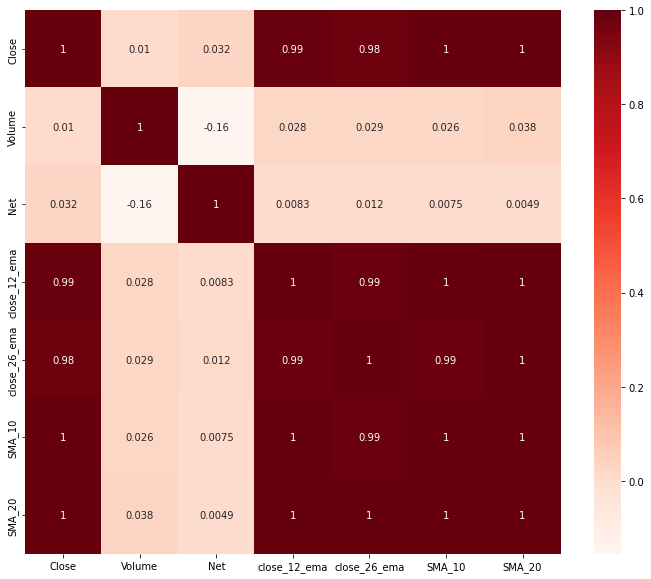

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
data = sp_prices[["Close","Volume","Net","close_12_ema","close_26_ema","SMA_10","SMA_20"]]
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
X = sp_prices[["Volume","Net","close_12_ema","close_26_ema","SMA_10","SMA_20"]][21:]
y = sp_prices["Close"][21:]

Exchange Date
2019-11-29    315.627314
2019-11-27    316.815685
2019-11-26    315.297766
2019-11-25    314.668628
2019-11-22    312.311859
                 ...    
2010-01-08    114.802620
2010-01-07    114.413154
2010-01-06    113.913838
2010-01-05    113.823961
2010-01-04    113.494413
Name: close, Length: 2495, dtype: float64

In [ ]:
X.fillna(0, inplace = True)

## Feature selction method 1: RFE

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# drop the 1 column in X
RFE_regressor = LinearRegression()
#Initializing RFE model
rfe = RFE(RFE_regressor, 4)# random number(2)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
RFE_regressor.fit(X,y)
print(rfe.support_)
print(rfe.ranking_)

[False  True  True False  True  True]
[3 1 1 2 1 1]


In [ ]:
feature_list = ["Volume","Net","close_12_ema","close_26_ema","SMA_10","SMA_20"]
relevant_features = []
for count, i in enumerate(feature_list):
  if rfe.support_[count] == True:
    relevant_features.append(i)
print(relevant_features)

['Net', 'close_12_ema', 'SMA_10', 'SMA_20']


## Feature Selection Method 2: Backward Elimination

In [ ]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

const           1.310717e-03
Volume          1.063433e-18
Net             0.000000e+00
close_12_ema    0.000000e+00
close_26_ema    4.669969e-04
SMA_10          0.000000e+00
SMA_20          0.000000e+00
dtype: float64

In [ ]:
cols = ["Volume","Net","close_12_ema","close_26_ema","SMA_10","SMA_20"]
pmax = 1
while (len(cols)>0):
    p= []
    X = sp_prices[cols][21:] 
    y = sp_prices["Close"][21:]
    X_1 = sm.add_constant(X)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.00001):
        cols.remove(feature_with_p_max)
    else:        break
    print(cols)
selected_features_BE = cols
print(selected_features_BE)

['Volume', 'Net', 'close_12_ema', 'SMA_10', 'SMA_20']
['Volume', 'Net', 'close_12_ema', 'SMA_10', 'SMA_20']


## Feature selection method 3: Embedded method with Lasso Regularisation

In [ ]:
reg = LassoCV()
cols = ["Volume","Net","close_12_ema","close_26_ema","SMA_10","SMA_20"]
X = sp_prices[cols][21:]
y = sp_prices["Close"][21:]
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)
print(coef)

Best alpha using built-in LassoCV: 1684.805257
Best score using built-in LassoCV: 0.760412
Volume         -5.818370e-08
Net             0.000000e+00
close_12_ema    2.523283e-01
close_26_ema    0.000000e+00
SMA_10          2.608877e-01
SMA_20          0.000000e+00
dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9222.207526665181, tolerance: 864.8688555660265
  positive)


In [ ]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")


Lasso picked 3 variables and eliminated the other 3 variables


In [ ]:
!pip install ta

  Created wheel for ta: filename=ta-0.7.0-py3-none-any.whl size=28718 sha256=23088c9be847cda8f2aab2eaca1c22a23f83cb6b9b2ba5d44dd39fb090d38647
  Stored in directory: /root/.cache/pip/wheels/5e/74/e0/72395003bd1d3c8f3f5860c2d180ff15699e47a2733d8ebd38
Successfully built ta


In [ ]:
from ta.trend import *
from ta.volatility import *
from ta.momentum import *
from ta.volume import *
import numpy as np
import pandas as pd

# Class setup indicators with ta library:
class TechnicalIndicator():
    def __init__(self, df):
        self.df = df
    
    
    def create_features(self):
        # self.get_std(col_name="close")
        # self.get_std(col_name="volume")
        
        self.get_ppo(col_name="close")
        self.get_ppo(col_name="open")
        
        self.get_kst()
        self.get_MACD()
        
        for window in [4,8,12,16]:
            self.get_roc(window=window)
        
        for window in [8,14,20]:
            self.get_rsi(window=window)
            
        for window in [8,14,20]:
            self.get_mfi(window=window)
        
        for window in [10,20,30]:
            self.get_cmf(window=window)
        
        for window in [10,20,30]:
            self.get_dpo(window=window)
            
        for window in [6,12,18]:   
            self.get_adx()
        
        for window in [5,9,13,19]:
            self.get_fi(window=window)
        
        for window in [8,14,20]:
            self.get_emv(window=window)
        
        for window in [10,15,20,25,30]:
            self.get_bb(window=window)
        
        for window in [8,14,20]:
            self.get_atr(window=window)
        
        for look_back in [8,14,20]:
            self.get_williamR(look_back=look_back)
        
        for window in [4,6,8,10,12,14,16,18,20,36,50]:
            self.get_sma(window=window)
            self.get_ema(window=window)
            self.get_wma(window=window)
            self.get_trix(window=window)
        
        for window in [10,15,20,25,30]:
            self.get_CCI(window=window)
        
        self.get_CMO(intervals=[10,15,20,25,30])
        

    def get_std(self, col_name: str = "close"):
        """
        Standard Deviation
        """
        self.df["std_{}".format(col_name)]=self.df[col_name].std()


    def get_roc(self, col_name: str = "close", window: int = 12):
        """
        The Rate-of-Change (ROC) indicator, which is also referred to as simply Momentum, is a pure momentum oscillator 
        that measures the percent change in price from one period to the next. The ROC calculation compares the current 
        price with the price “n” periods ago.
        """
        self.df['roc_{}_{}'.format(window, col_name)] = ROCIndicator(self.df[col_name], window).roc()
        

    def get_ppo(self, col_name: str = "close"):
        """
        The Percentage Price Oscillator (PPO) is a momentum oscillator that measures the difference between two moving 
        averages as a percentage of the larger moving average.
        """
        ppo_indicator = PercentagePriceOscillator(close=self.df[col_name], window_slow=26, window_fast=12, window_sign=9, fillna=False)
        self.df['ppo_{}'.format(col_name)] = ppo_indicator.ppo()
        
        
    def get_rsi(self, col_name: str = "close", window: int = 14):
        """
        The Relative Strength Index RSI) is a momentum indicator used in technical analysis that measures the magnitude 
        of recent price changes to evaluate overbought or oversold conditions in the price of a stock or other asset. 
        """
        self.df['rsi_{}_{}'.format(window, col_name)] = RSIIndicator(self.df[col_name], window).rsi()

        
    def get_mfi(self, high: str = "high", low: str = "low", close: str = "close", volume: str = "volume", window: int = 14):
        """
        Money Flow Index* (MFI) uses both price and volume to measure buying and selling pressure.
        """
        indicator_mfi = MFIIndicator(self.df[high], self.df[low], self.df[close], self.df[volume], window)
        self.df['mfi_{}'.format(window)] = indicator_mfi.money_flow_index()

        
    def get_cmf(self, high: str = "high", low: str = "low", close: str = "close", volume: str = "volume", window: int = 14):
        """
        Chaikin Money Flow (CMF) it measures the amount of Money Flow Volume over a specific period.
        """
        indicator_cmf = ChaikinMoneyFlowIndicator(self.df[high], self.df[low], self.df[close], self.df[volume], window)
        self.df['cmf_{}'.format(window)] = indicator_cmf.chaikin_money_flow()

        
    def get_dpo(self, close: str = "close", window: int = 20):
        """
        Detrended Price Oscillator (DPO) Is an indicator designed to remove trend from price and make it easier to identify cycles.
        """
        indicator_dpo = DPOIndicator(self.df[close], window)
        self.df['dpo_{}'.format(window)] = indicator_dpo.dpo()

        
    def get_kst(self, close: str = "close", roc1: int = 10, roc2: int = 15, roc3: int = 20, roc4: int = 30, 
                window1: int = 10, window2: int = 10, window3: int = 10, window4: int = 15, nsig: int= 9, fillna: bool = False):  
        """
        KST Oscillator (KST) is useful to identify major stock market cycle junctures because its formula is weighed 
        to be more greatly influenced by the longer and more dominant time spans, in order to better reflect the primary 
        swings of stock market cycle.
        """
        indicator_kst = KSTIndicator(self.df[close], roc1, roc2, roc3, roc4, window1, window2, window3, window4, nsig, fillna)
        self.df['kst'] = indicator_kst.kst()

        
    def get_adx(self, high: str = "high", low: str = "low", close: str = "close", window: int = 14):
        """
        Average Directional Movement Index (ADX)
        """
        indicator_adx = ADXIndicator(self.df[high], self.df[low], self.df[close], window)
        self.df['adx_{}'.format(window)] = indicator_adx.adx()

        
    def get_fi(self, close: str = "close", volume: str = "volume", window: int = 13):
        """
        Force Index (FI) it illustrates how strong the actual buying or selling pressure is. High positive values mean 
        there is a strong rising trend, and low values signify a strong downward trend.
        """
        indicator_fi = ForceIndexIndicator(self.df[close], self.df[volume], window)
        self.df['fi_{}'.format(window)] = indicator_fi.force_index()

        
    def get_emv(self, high: str = "high", low: str = "low", volume: str = "volume", window: int = 14):
        """
        Ease of movement (EoM, EMV) it relate an asset’s price change to its volume and is particularly useful for assessing the strength of a trend.
        """
        indicator_emv = EaseOfMovementIndicator(self.df[high], self.df[low], self.df[volume], window)
        self.df['emv_{}'.format(window)] = indicator_emv.ease_of_movement()

        
    def get_bb(self, close: str = "close", window: int = 20):
        """
        Bollinger Bands are envelopes plotted at a standard deviation level above and below a simple moving average of the price. 
        Bollinger bands help determine whether prices are high or low on a relative basis.
        """
        indicator_bb = BollingerBands(self.df[close], window)
        self.df['bb_bbm'] = indicator_bb.bollinger_mavg()
        self.df['bb_bbh'] = indicator_bb.bollinger_hband()
        self.df['bb_bbl'] = indicator_bb.bollinger_lband()
        self.df['bb_bbhi'] = indicator_bb.bollinger_hband_indicator()
        self.df['bb_bbli'] = indicator_bb.bollinger_lband_indicator()
        self.df['bb_bbhi'] = indicator_bb.bollinger_hband()
        self.df['bb_bbw'] = indicator_bb.bollinger_wband()
        self.df['bb_bbp'] = indicator_bb.bollinger_pband()

        
    def get_atr(self, high: str = "high", low: str = "low", close: str = "close", window: int = 14):
        """
        Average True Range indicator provide an indication of the degree of price volatility. 
        Strong moves, in either direction, are often accompanied by large ranges, or large True Ranges.
        """
        indicator_atr = AverageTrueRange(self.df[high], self.df[low], self.df[close], window)
        self.df['atr_{}'.format(window)] = indicator_atr.average_true_range()

        
    def get_williamR(self, high: str = "high", low: str = "low", close: str = "close", look_back: int = 14):
        """
        The Williams Percent Range is a type of momentum indicator that moves between 0 and -100 and measures overbought and oversold levels. 
        """
        self.df["wr_" + str(look_back)] = WilliamsRIndicator(self.df[high], self.df[low], self.df[close], look_back, fillna=True).williams_r()

    
    def get_MACD(self, close: str = "close"):
        """
        Moving Average Convergence Divergence (MACD) is a trend-following momentum indicator that shows the relationship between two moving averages of prices.
        """
        macd_ind = MACD(self.df[close], window_slow=26, window_fast=12, window_sign=9, fillna=False)
        self.df["macd"] = macd_ind.macd()


    def get_sma(self, col_name: str = "close", window: int = 14):
        """
        Simple Moving Average
        """
        sma_indicator = SMAIndicator(close = self.df[col_name], window = window, fillna = False)
        self.df['sma_{}_{}'.format(window, col_name)] = sma_indicator.sma_indicator()


    def get_ema(self, col_name: str = "close", window: int = 14): 
        """
        Exponential Moving Average
        """
        ema_indicator = EMAIndicator(close = self.df[col_name], window = window, fillna = False)
        self.df['ema_{}_{}'.format(window, col_name)] = ema_indicator.ema_indicator()

                
    def get_wma(self, col_name: str = "close", window: int = 9):
        """
        Weighted Moving Average
        """
        indicator_wma = WMAIndicator(self.df[col_name], window)
        self.df['wma_{}_{}'.format(window, col_name)] = indicator_wma.wma()
    
        
    def get_trix(self, col_name: str = "close", window: int = 15):
        """
        Trix shows the percent rate of change of a triple exponentially smoothed moving average.
        """
        indicator_trix = TRIXIndicator(self.df[col_name], window)
        self.df['trix_{}'.format(window)] = indicator_trix.trix()


    def get_CCI(self, high: str = "high", low: str = "low", close: str = "close", window: int = 20):
        """
        Commodity Channel Index(CCI) measures the difference between a security’s price change and its average price change. 
        High positive readings indicate that prices are well above their average, which is a show of strength. 
        Low negative readings indicate that prices are well below their average, which is a show of weakness.
        """
        cci_inidcator = CCIIndicator(high=self.df[high], low=self.df[high], close=self.df[close], window=window, constant=0.015, fillna=False)
        self.df['cci_{}'.format(window)] = cci_inidcator.cci()

        
    def get_CMO(self,  intervals: int, col_name: str = "close"):
        """
        Chande Momentum Oscillator is created by calculating the difference between the sum of all recent higher closes 
        and the sum of all recent lower closes and then dividing the result by the sum of all price movement over a given time period. 
        
        As per https://www.fidelity.com/learning-center/trading-investing/technical-analysis/technical-indicator-guide/cmo
        CMO = 100 * ((Sum(ups) - Sum(downs))/ ( (Sum(ups) + Sum(downs) ) )
        range = +100 to -100
        params: df -> dataframe with financial instrument history
                col_name -> column name for which CMO is to be calculated
                intervals -> list of periods for which to calculated
        return: None (adds the result in a column)
        """
        
        def calculate_CMO(series, period):
            # num_gains = (series >= 0).sum()
            # num_losses = (series < 0).sum()
            sum_gains = series[series >= 0].sum()
            sum_losses = np.abs(series[series < 0].sum())
            cmo = 100 * ((sum_gains - sum_losses) / (sum_gains + sum_losses))
            return np.round(cmo, 3)

        diff = self.df[col_name].diff()[1:]  # skip na
        for period in intervals:
            self.df['cmo_' + str(period)] = np.nan
            res = diff.rolling(period).apply(calculate_CMO, args=(period,), raw=False)
            self.df['cmo_' + str(period)][1:] = res

In [ ]:
sp_indicators = TechnicalIndicator(sp_prices)

In [ ]:
sp_prices.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2019-12-17', '2019-12-18', '2019-12-19', '2019-12-20',
               '2019-12-23', '2019-12-24', '2019-12-26', '2019-12-27',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', name='Exchange Date', length=2516, freq=None)

In [ ]:
sp_prices.rename(columns={"Close": "close","Open":"open","High":"high","Low":"low","Volume":"volume"}, inplace = True)
sp_prices.index = pd.to_datetime(sp_prices.index)

In [ ]:
sp_indicators.create_features()

TypeError: ignored

In [ ]:
sp_prices.head()

,Open,Close,Low,High,Low,Volume,Net
Exchange Date,,,,,,,
2010-01-04,112.615618,113.494413,112.555700,113.584290,112.555700,3574136,NaN
2010-01-05,113.464454,113.823961,113.094961,113.873893,113.094961,2784094,0.329548
2010-01-06,113.734085,113.913838,113.634221,114.183469,113.634221,3912789,0.089877
2010-01-07,113.714112,114.413154,113.394550,114.513017,113.394550,2977514,0.499315
2010-01-08,114.073619,114.802620,113.853920,114.812606,113.853920,2887536,0.389466
